In [99]:
print(1+2)

3


In [100]:
# !pip install qiskit==1.4.4 qiskit-machine-learning==0.8.4

In [101]:
!pip list | grep qiskit

qiskit                                   1.4.4
qiskit-aer                               0.17.2
qiskit-machine-learning                  0.8.4


#### **Classification**

<br>

---

<br>

**1. defining dataset**

---

In [102]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dim = 2
x_train, y_train, x_test, y_test = ad_hoc_data(
    training_size=20,
    test_size=5,
    gap=0.3,
    n=adhoc_dim,
    plot_data=False,
    one_hot=False
)


In [103]:

adhoc_total = len(x_train) + len(x_test)
print(adhoc_total)

print(type(x_train))

print(f'x_train len : {len(x_train)}, x_test len : {len(x_test)}, y_train len : {len(y_train)}, y_test len : {len(y_test)}')
print(f'x_train[0] : {x_train[0]}')
print(f'y_train[0] : {y_train[0]}')

50
<class 'numpy.ndarray'>
x_train len : 40, x_test len : 10, y_train len : 40, y_test len : 10
x_train[0] : [2.38761042 0.37699112]
y_train[0] : 0


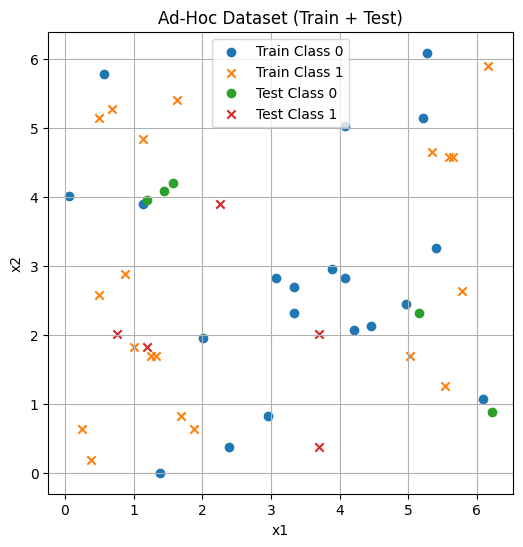

In [104]:
import matplotlib.pyplot as plt
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

plt.figure(figsize=(6,6))

# Training data
plt.scatter(x_train[y_train==0][:,0], x_train[y_train==0][:,1], label="Train Class 0", marker='o')
plt.scatter(x_train[y_train==1][:,0], x_train[y_train==1][:,1], label="Train Class 1", marker='x')

# Test data (different markers)
plt.scatter(x_test[y_test==0][:,0], x_test[y_test==0][:,1], label="Test Class 0", marker='o')
plt.scatter(x_test[y_test==1][:,0], x_test[y_test==1][:,1], label="Test Class 1", marker='x')

plt.title("Ad-Hoc Dataset (Train + Test)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


<br>

**2. defining the quantum kernel**

---

In [105]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_total, reps=2, entanglement='linear')
adhoc_sampler = Sampler()
adhoc_fidelity = ComputeUncompute(sampler=adhoc_sampler)
adhoc_kernel = FidelityQuantumKernel(feature_map=adhoc_feature_map, fidelity=adhoc_fidelity)

<br>

**3. classification with SVC**

---

In [106]:
from sklearn.svm import SVC

# pass quantum kernel as callable

adhoc_callable_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_callable_svc.fit(x_train, y_train)
adhoc_callable_svc_score = adhoc_callable_svc.score(x_test, y_test)

print(f'callable kernel classification accuracy: {adhoc_callable_svc_score}')

callable kernel classification accuracy: 1.0


precomputed kernel classification accuracy: 1.0


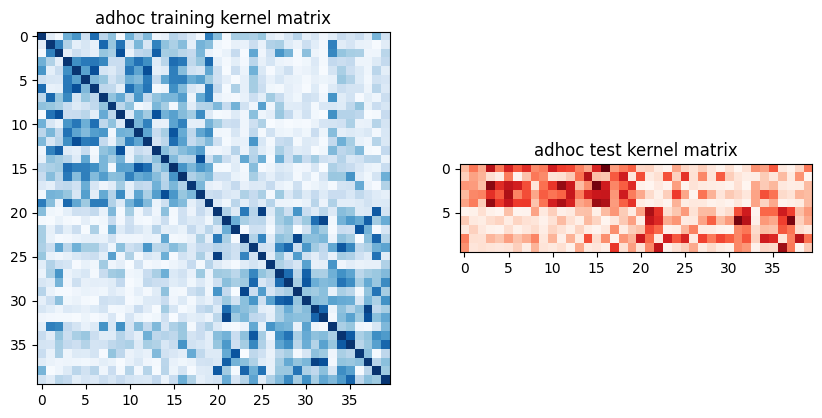

In [107]:
# precomputed kernel matrix
adhoc_matrix_train = adhoc_kernel.evaluate(x_train)
adhoc_matrix_test = adhoc_kernel.evaluate(x_test, x_train)

adhoc_pre_svc = SVC(kernel='precomputed')
adhoc_pre_svc.fit(adhoc_matrix_train, y_train)
adhoc_pre_svc_score = adhoc_pre_svc.score(adhoc_matrix_test, y_test)
print(f'precomputed kernel classification accuracy: {adhoc_pre_svc_score}')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues")
axs[0].set_title('adhoc training kernel matrix')

axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title('adhoc test kernel matrix')

plt.show()

<br>

**4. classification with QSVC**

---

In [108]:
from qiskit_machine_learning.algorithms import QSVC

adhoc_qsvc = QSVC(quantum_kernel=adhoc_kernel)
adhoc_qsvc.fit(x_train, y_train)
adhoc_qsvc_score = adhoc_qsvc.score(x_test, y_test)
print(f'QSVC classification accuracy: {adhoc_qsvc_score}')

QSVC classification accuracy: 1.0


<br>

**5. models evaluation**

---

In [109]:
print(f"Classification models         |   Accuracy Score")
print("---------------------------------------------------")
print(f"Callable Kernel SVC           |   {adhoc_callable_svc_score}")
print(f"Precomputed Kernel SVC        |   {adhoc_pre_svc_score}")
print(f"Quantum Kernel SVC            |   {adhoc_qsvc_score}")

Classification models         |   Accuracy Score
---------------------------------------------------
Callable Kernel SVC           |   1.0
Precomputed Kernel SVC        |   1.0
Quantum Kernel SVC            |   1.0


#### **Clustering**

<br>

---

<br>

**1. defining dataset**

---

In [110]:
adhoc_dim = 2
x_train, y_train, x_test, y_test, adhoc_total = ad_hoc_data(
    training_size=25,
    test_size=0,
    n=adhoc_dim,
    gap=0.6,
    plot_data=False,
    one_hot=False,
    include_sample_total=True
)

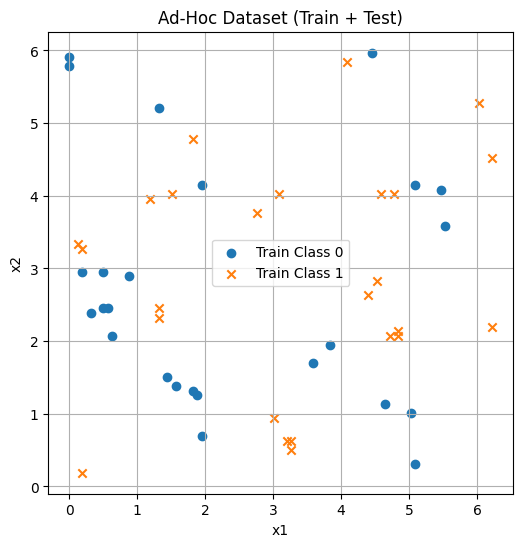

In [111]:

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

plt.figure(figsize=(6,6))

# Training data
plt.scatter(x_train[y_train==0][:,0], x_train[y_train==0][:,1], label="Train Class 0", marker='o')
plt.scatter(x_train[y_train==1][:,0], x_train[y_train==1][:,1], label="Train Class 1", marker='x')

plt.title("Ad-Hoc Dataset (Train + Test)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


<br>

**2. defining quantum kernel**

---

In [112]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dim, reps=2, entanglement='linear')
adhoc_kernel = FidelityQuantumKernel(feature_map=adhoc_feature_map, fidelity=adhoc_fidelity)


<br>

**3. clustering with the spectral clustering model**

---

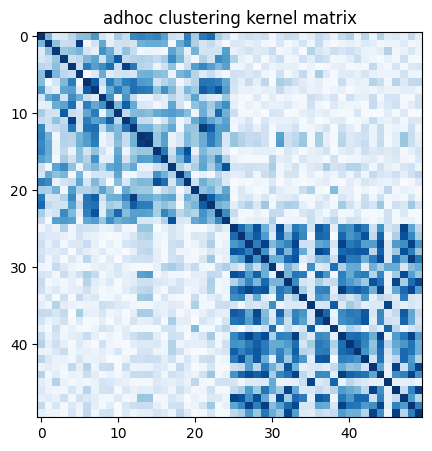

In [113]:
adhoc_matrix = adhoc_kernel.evaluate(x_train)

plt.figure(figsize=(10, 5))
plt.imshow(np.asmatrix(adhoc_matrix), interpolation="nearest", origin="upper", cmap="Blues")
plt.title('adhoc clustering kernel matrix')
plt.show()

In [114]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

adhoc_spectral = SpectralClustering(2, affinity="precomputed")
cluster_labels = adhoc_spectral.fit_predict(adhoc_matrix)
cluster_score = normalized_mutual_info_score(cluster_labels, y_train)

print(f"Clustering score: {cluster_score}")

Clustering score: 1.0


#### **kernel PCA**

<br>

---


<br>

**1. defining dataset**

---

In [115]:

adhoc_dim = 2
x_train, y_train, x_test, y_test = ad_hoc_data(
    training_size=25,
    test_size=10,
    gap=0.6,
    n=adhoc_dim,
    plot_data=False,
    one_hot=False
)


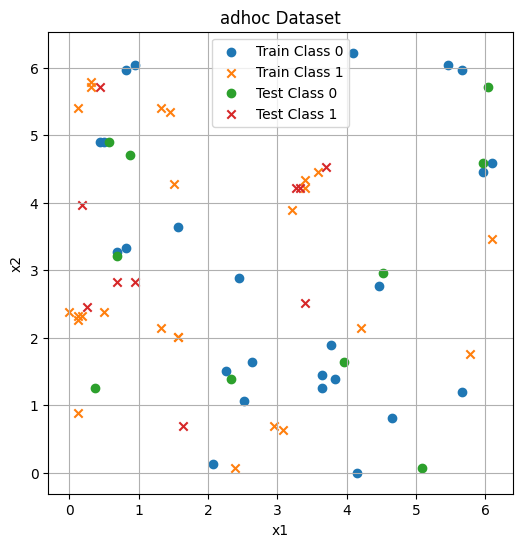

In [116]:

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

plt.figure(figsize=(6,6))

# Training data
plt.scatter(x_train[y_train==0][:,0], x_train[y_train==0][:,1], label="Train Class 0", marker='o')
plt.scatter(x_train[y_train==1][:,0], x_train[y_train==1][:,1], label="Train Class 1", marker='x')

# Test data (different markers)
plt.scatter(x_test[y_test==0][:,0], x_test[y_test==0][:,1], label="Test Class 0", marker='o')
plt.scatter(x_test[y_test==1][:,0], x_test[y_test==1][:,1], label="Test Class 1", marker='x')

plt.title("adhoc Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()



<br>

**2. defining kernel**

---

In [117]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dim, reps=2, entanglement='linear')
qpca_kernel = FidelityQuantumKernel(feature_map=adhoc_feature_map, fidelity=adhoc_fidelity)

In [118]:
adhoc_matrix_train = qpca_kernel.evaluate(x_train)
adhoc_matrix_test = qpca_kernel.evaluate(x_test, x_train)


<br>

**3. comparison of kernel PCA on gaussian and quantum kernel**

---

In [119]:
from sklearn.decomposition import KernelPCA

kernel_pca_rbf = KernelPCA(n_components=2, kernel="rbf")
kernel_pca_rbf.fit(x_train)
x_train_rbf = kernel_pca_rbf.transform(x_train)
x_test_rbf = kernel_pca_rbf.transform(x_test)

kernel_pca_q = KernelPCA(n_components=2, kernel="precomputed")
x_train_q = kernel_pca_q.fit_transform(adhoc_matrix_train)
x_test_q = kernel_pca_q.transform(adhoc_matrix_test)

In [120]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_q, y_train)

logistic_score = logistic_regression.score(x_test_q, y_test)
print(f"Logistic regression score: {logistic_score}")

Logistic regression score: 0.95


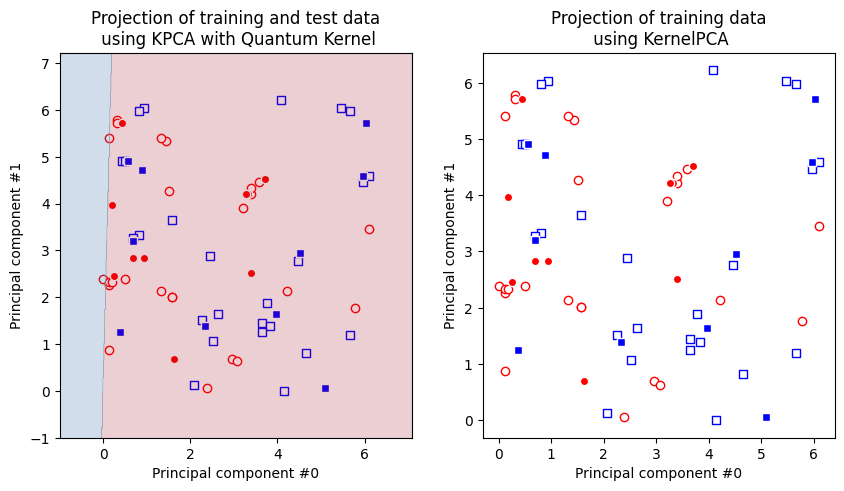

In [121]:
def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    ax.scatter(
        features[np.where(labels[:] == class_label), 0],
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )

fig, (q_ax, rbf_ax) = plt.subplots(1, 2, figsize=(10, 5))


plot_features(q_ax, x_train, y_train, 0, "s", "w", "b", "A train")
plot_features(q_ax, x_train, y_train, 1, "o", "w", "r", "B train")

plot_features(q_ax, x_test, y_test, 0, "s", "b", "w", "A test")
plot_features(q_ax, x_test, y_test, 1, "o", "r", "w", "A test")

q_ax.set_ylabel("Principal component #1")
q_ax.set_xlabel("Principal component #0")
q_ax.set_title("Projection of training and test data\n using KPCA with Quantum Kernel")

# Plotting the linear separation
h = 0.01  # step size in the mesh

# create a mesh to plot in
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

predictions = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
predictions = predictions.reshape(xx.shape)
q_ax.contourf(xx, yy, predictions, cmap=plt.cm.RdBu, alpha=0.2)

plot_features(rbf_ax, x_train, y_train, 0, "s", "w", "b", "A train")
plot_features(rbf_ax, x_train, y_train, 1, "o", "w", "r", "B train")
plot_features(rbf_ax, x_test, y_test, 0, "s", "b", "w", "A test")
plot_features(rbf_ax, x_test, y_test, 1, "o", "r", "w", "A test")

rbf_ax.set_ylabel("Principal component #1")
rbf_ax.set_xlabel("Principal component #0")
rbf_ax.set_title("Projection of training data\n using KernelPCA")
plt.show()
